# Projeto Final

In [1]:
#Importação das bibliotecas

import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
import warnings
from utils import my_barplot, my_numerical_graphics
warnings.filterwarnings("ignore")

In [2]:
#conexão
conn = psycopg2.connect(
    host="localhost",
    database="credito",
    user="postgres",
    password="1234",
    port=5432,
)

In [3]:
#cria um cursor
cursor = conn.cursor()
#define consulta
query = 'SELECT * FROM CREDITO_CATEGORICO;'
#executa
df_credito = pd.read_sql(query, conn)
df_credito.head(10)

,IdCredito,Duracao,HistoricoCredito,Proposito,Valor,Investimentos,Emprego,TempoParcelamento,EstadoCivil,Fiador,ResidenciaDesde,Idade,OutrosFinanciamentos,Habitacao,EmprestimoExistente,Profissao,Dependentes,SocioEmpresa,Estrangeiro,Inadimplente
0,2,48,existentes/pagos,reforma,5951,<100\\n,1<=X<4,2,Solteiro,nao,2.0,22,nenhum,propria,1,qualificado,1,nao,nao,nao
1,3,12,Critico-outros creditos,educacao,2096,<100\\n,4<=X<7,2,Viuvo,nao,3.0,49,nenhum,propria,1,nao qualificado,2,nao,nao,sim
2,4,42,existentes/pagos,moveis,7882,<100\\n,4<=X<7,2,Viuvo,sim,4.0,45,nenhum,de graca,1,qualificado,2,nao,nao,sim
3,5,24,Atrasos anteriores,veiculo novo,4870,<100\\n,1<=X<4,3,Viuvo,nao,4.0,53,nenhum,de graca,2,qualificado,2,nao,nao,nao
4,6,36,existentes/pagos,educacao,9055,Desconhecido\\n,1<=X<4,2,Viuvo,nao,4.0,35,nenhum,de graca,1,nao qualificado,2,sim,nao,sim
5,7,24,existentes/pagos,moveis,2835,500<=X<1000,>=7,3,Viuvo,nao,4.0,53,nenhum,propria,1,qualificado,1,nao,nao,sim
6,9,12,existentes/pagos,reforma,3059,>=1000,4<=X<7,2,Casado,nao,4.0,61,nenhum,propria,1,nao qualificado,1,nao,nao,sim
7,11,12,existentes/pagos,veiculo novo,1295,<100\\n,<1,3,Solteiro,nao,1.0,25,nenhum,alugada,1,qualificado,1,nao,nao,nao
8,13,12,existentes/pagos,reforma,1567,<100\\n,1<=X<4,1,Solteiro,nao,1.0,22,nenhum,propria,1,qualificado,1,sim,nao,sim
9,14,24,Critico-outros creditos,veiculo novo,1199,<100\\n,>=7,4,Viuvo,nao,4.0,60,nenhum,propria,2,nao qualificado,1,nao,nao,nao


Análise Exploratoria dos Dados

Dados Categoricos

In [6]:
# Agrupado por HistoricoCredito
groupby_HistoricoCredito = df_credito.groupby(df_credito['HistoricoCredito']).size()
print(groupby_HistoricoCredito)

HistoricoCredito
Atrasos anteriores           86
Critico-outros creditos     289
existentes/pagos            526
sem creditos/todos pagos     40
todos pagos                  48
dtype: int64


In [7]:
# Agrupado por Proposito
groupby_Proposito = df_credito.groupby([df_credito['Proposito']]).size()
groupby_Proposito

Proposito
abrir negocio     97
educacao          50
moveis           181
outros            12
qualificacao       9
quitar divida     12
reforma          280
reforma casa      22
veiculo novo     234
veiculo usado    103
dtype: int64

In [8]:
# Agrupado por Investimentos
groupby_Investimentos = df_credito.groupby(['Investimentos']).size()
groupby_Investimentos

Investimentos
100<=X<500         103
500<=X<1000         63
<100\\n            603
>=1000              48
Desconhecido\\n    183
dtype: int64

In [9]:
# Agrupado por Emprego
groupby_Emprego = df_credito.groupby(df_credito['Emprego']).size()
groupby_Emprego

Emprego
1<=X<4          338
4<=X<7          172
<1              171
>=7             247
Desempregado     62
dtype: int64

In [10]:
# Agrupado por EstadoCivil
groupby_EstadoCivil = df_credito.groupby([df_credito['EstadoCivil']]).size()
groupby_EstadoCivil

EstadoCivil
Casado         50
Divorciado     92
Solteiro      310
Viuvo         548
dtype: int64

In [11]:
# Agrupado por Fiador
groupby_Fiador = df_credito.groupby([df_credito['Fiador']]).size()
groupby_Fiador

Fiador
co aplicante       1
co requerente     39
nao              908
sim               52
dtype: int64

In [12]:
# Agrupado por Habitacao
groupby_Habitacao = df_credito.groupby([df_credito['Habitacao']]).size()
groupby_Habitacao

Habitacao
alugada     175
de graca    107
propria     709
dtype: int64

In [13]:
# Agrupado por OutrosFinanciamentos
groupby_OutrosFinanciamentos = df_credito.groupby([df_credito['OutrosFinanciamentos']]).size()
groupby_OutrosFinanciamentos

OutrosFinanciamentos
banco     139
loja       47
nenhum    814
dtype: int64

In [14]:
# Agrupado por Profissao
groupby_Profissao = df_credito.groupby([df_credito['Profissao']]).size()
groupby_Profissao

Profissao
altamente qualificado/empresario    147
desempregado                         22
nao qualificado                     197
qualificado                         625
dtype: int64

In [15]:
# Agrupado por Profissao
groupby_Investimentos = df_credito.groupby([df_credito['Investimentos']]).size()
groupby_Investimentos

Investimentos
100<=X<500         103
500<=X<1000         63
<100\\n            603
>=1000              48
Desconhecido\\n    183
dtype: int64

In [16]:
# Agrupado por SocioEmpresa
groupby_SocioEmpresa = df_credito.groupby([df_credito['SocioEmpresa']]).size()
groupby_SocioEmpresa

SocioEmpresa
nao    596
sim    404
dtype: int64

In [17]:
# Agrupado por Estrangeiro
groupby_Estrangeiro = df_credito.groupby([df_credito['Estrangeiro']]).size()
groupby_Estrangeiro

Estrangeiro
nao    963
sim     37
dtype: int64

In [18]:
# Agrupado por Inadimplente
groupby_Inadimplente = df_credito.groupby([df_credito['Inadimplente']]).size()
groupby_Inadimplente

Inadimplente
nao    300
sim    700
dtype: int64

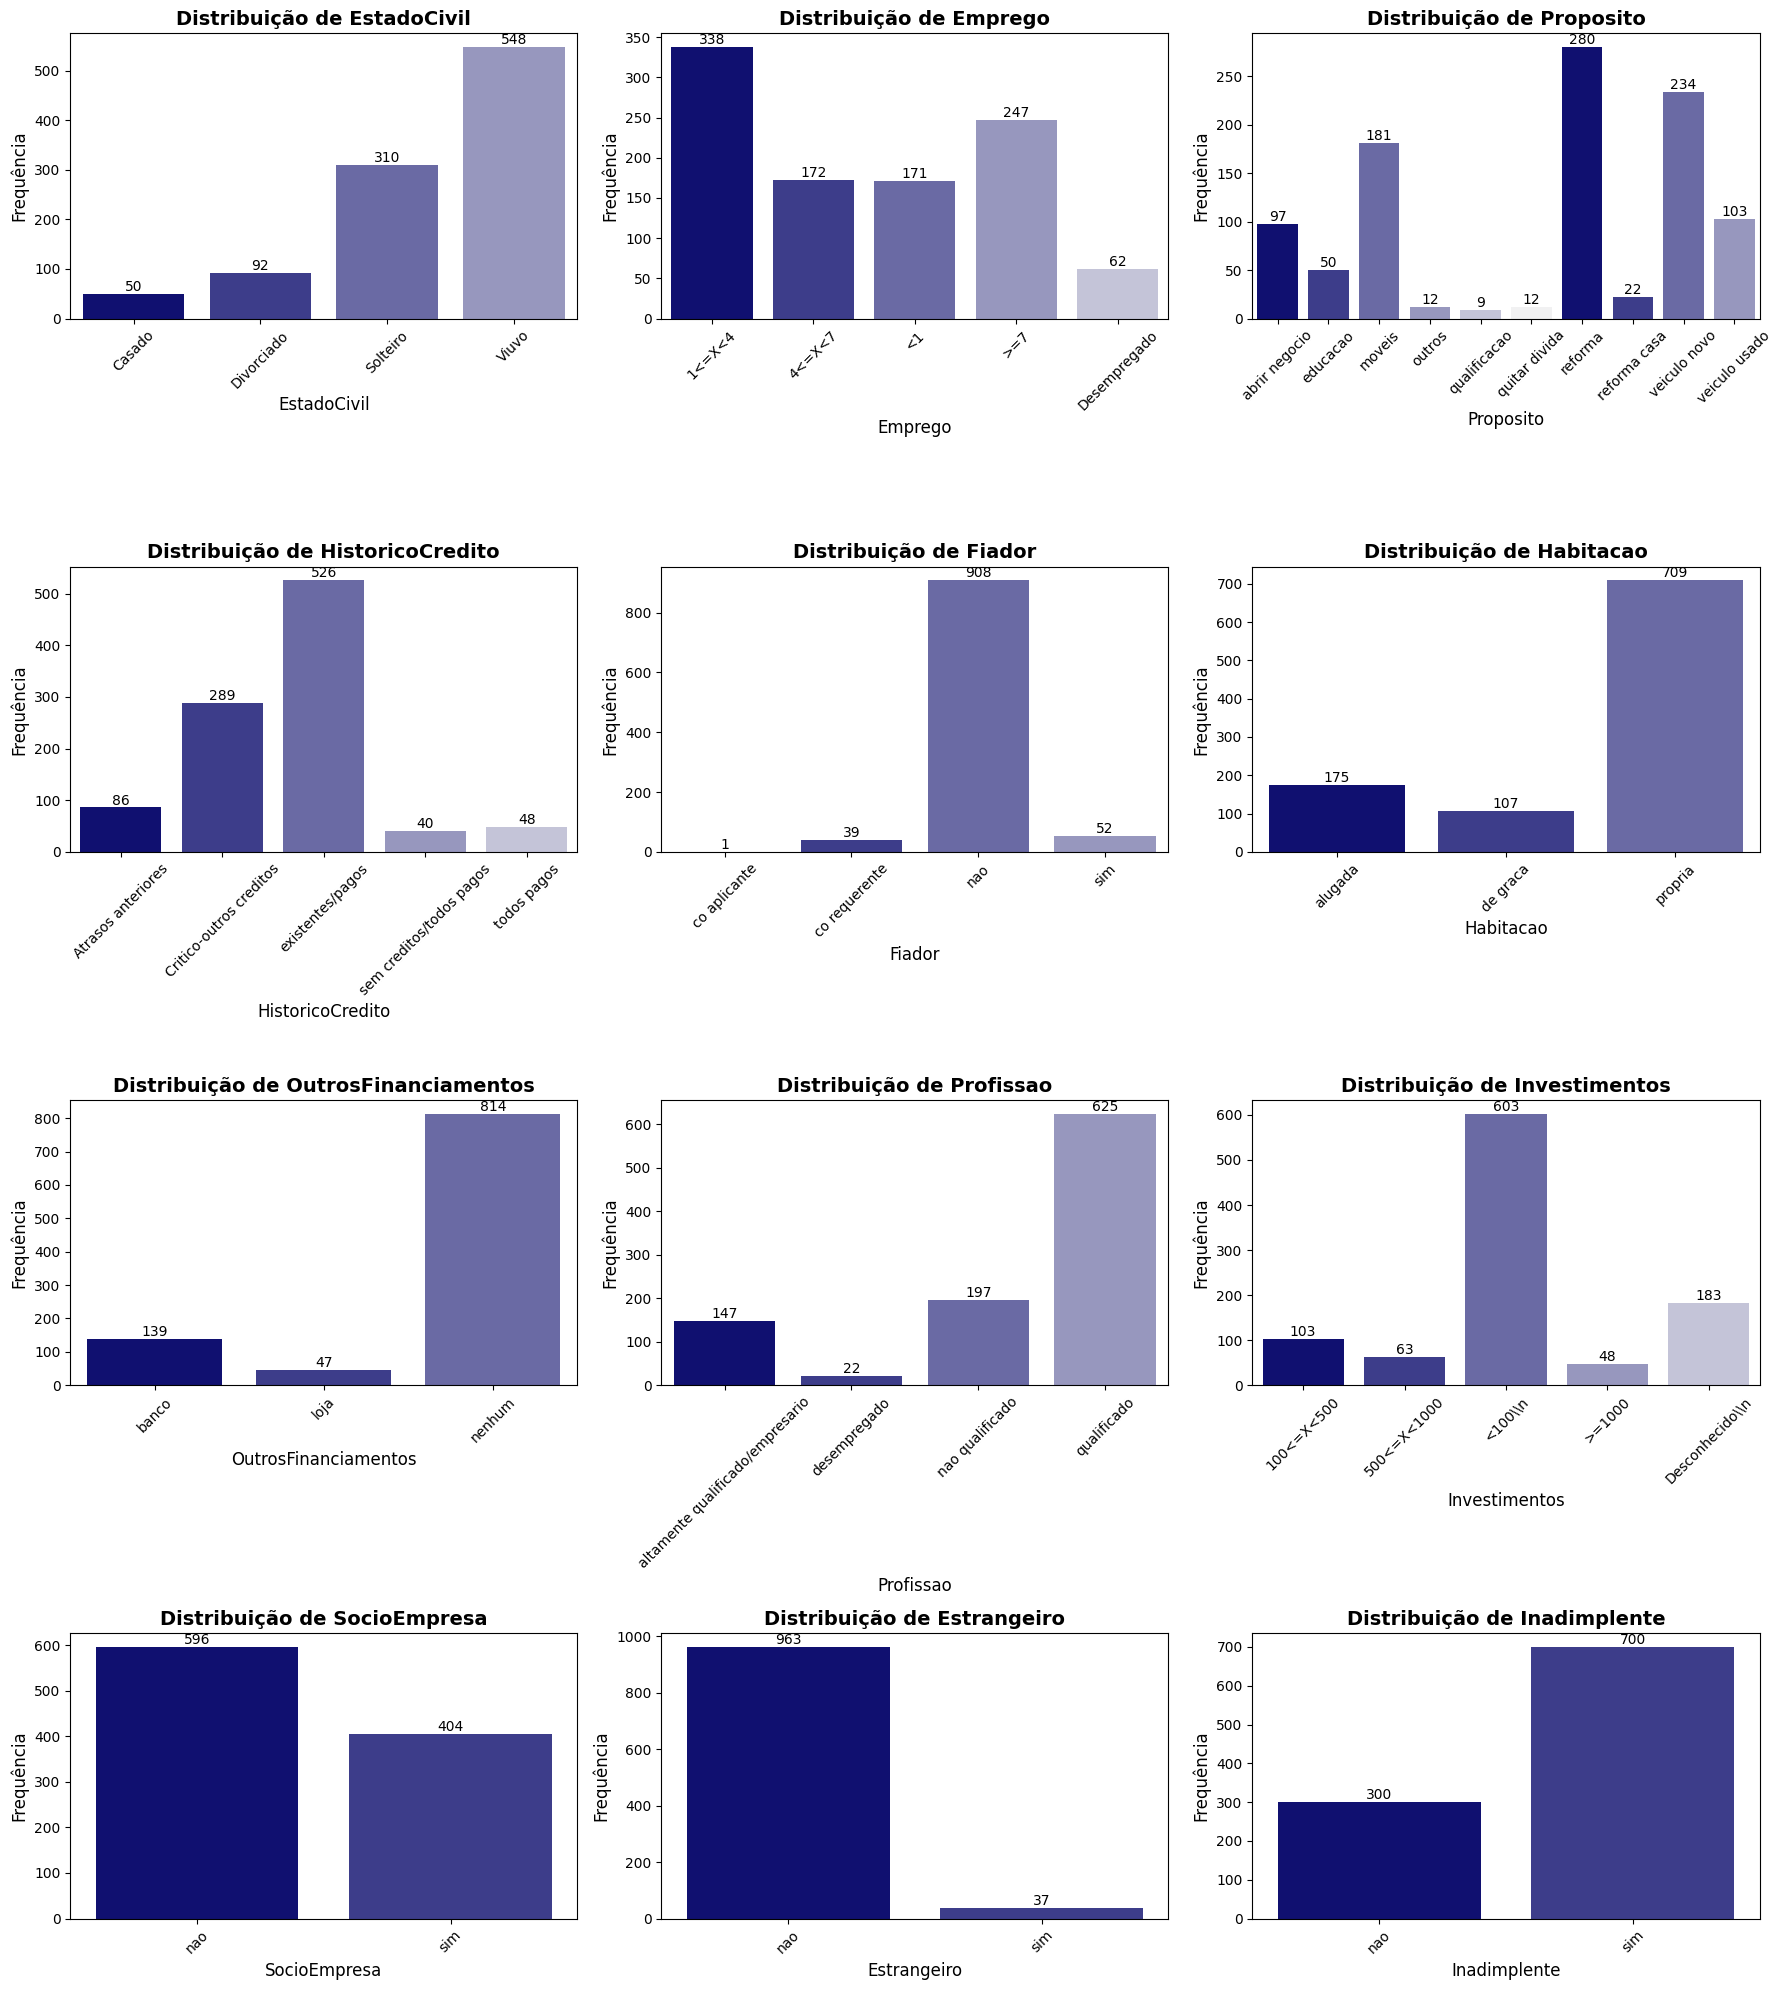

In [19]:
# Plot de barplot associado as colunas categoricas 
column_names = ['EstadoCivil', 'Emprego', 'Proposito', 'HistoricoCredito', 'Fiador', 
                'Habitacao', 'OutrosFinanciamentos', 'Profissao', 'Investimentos','SocioEmpresa', 'Estrangeiro', 'Inadimplente']

my_barplot(df_credito, column_names) # type: ignore


In [20]:
# Selecionar apenas as colunas categóricas
categorical_columns = df_credito.select_dtypes(include=['object', 'category'])

# Contar valores faltantes apenas nas colunas categóricas
missing_values_categorical = categorical_columns.isnull().sum()

# Filtrar para mostrar apenas colunas com valores faltantes
missing_values_categorical = missing_values_categorical[missing_values_categorical > 0]

print(missing_values_categorical)

HistoricoCredito    11
Emprego             10
Habitacao            9
Profissao            9
dtype: int64


Dados Numéricos

In [23]:
# Coluna Duracao
df_credito['Duracao'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duracao, dtype: float64

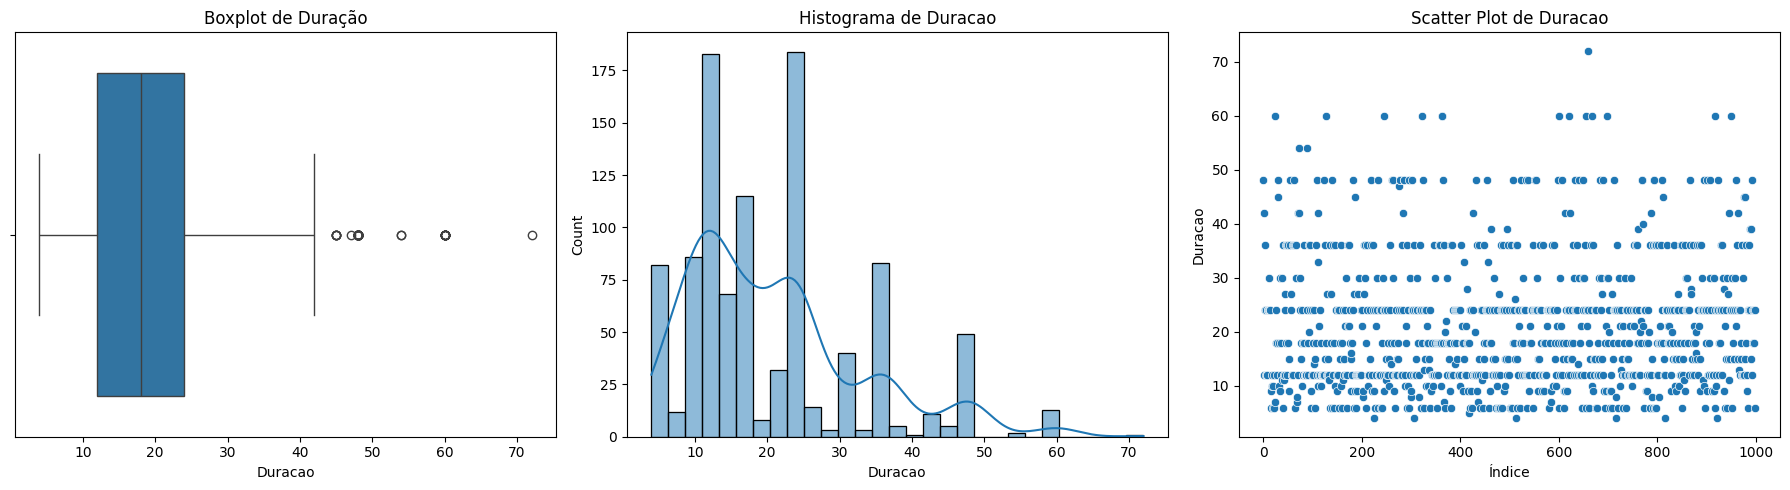

In [22]:
# Graficos
my_numerical_graphics(df_credito, 'Duracao')

In [ ]:
# Coluna Valor
df_credito['Valor'].describe()

count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Valor, dtype: float64

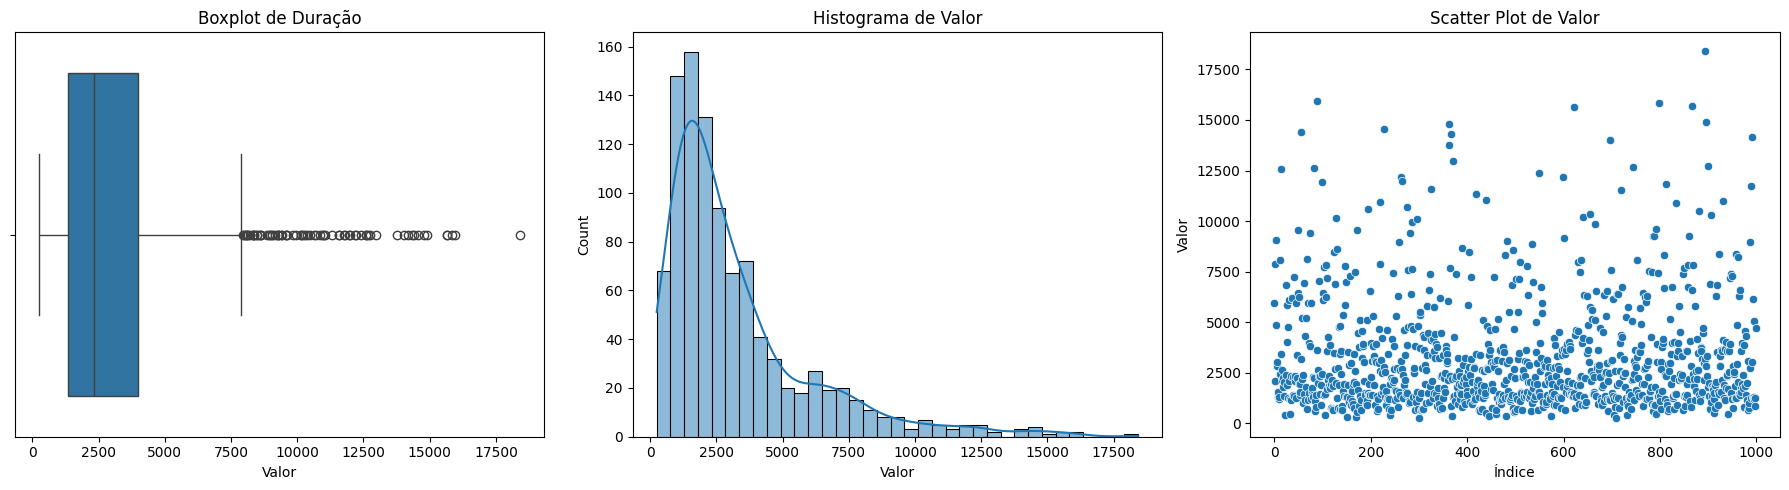

In [ ]:
# Gráficos
my_numerical_graphics(df_credito,'Valor')

In [17]:
# Coluna TempoParcelamento
groupby_TempoParcelamento = df_credito.groupby(df_credito['TempoParcelamento']).size()
groupby_TempoParcelamento

TempoParcelamento
1    136
2    231
3    157
4    476
dtype: int64

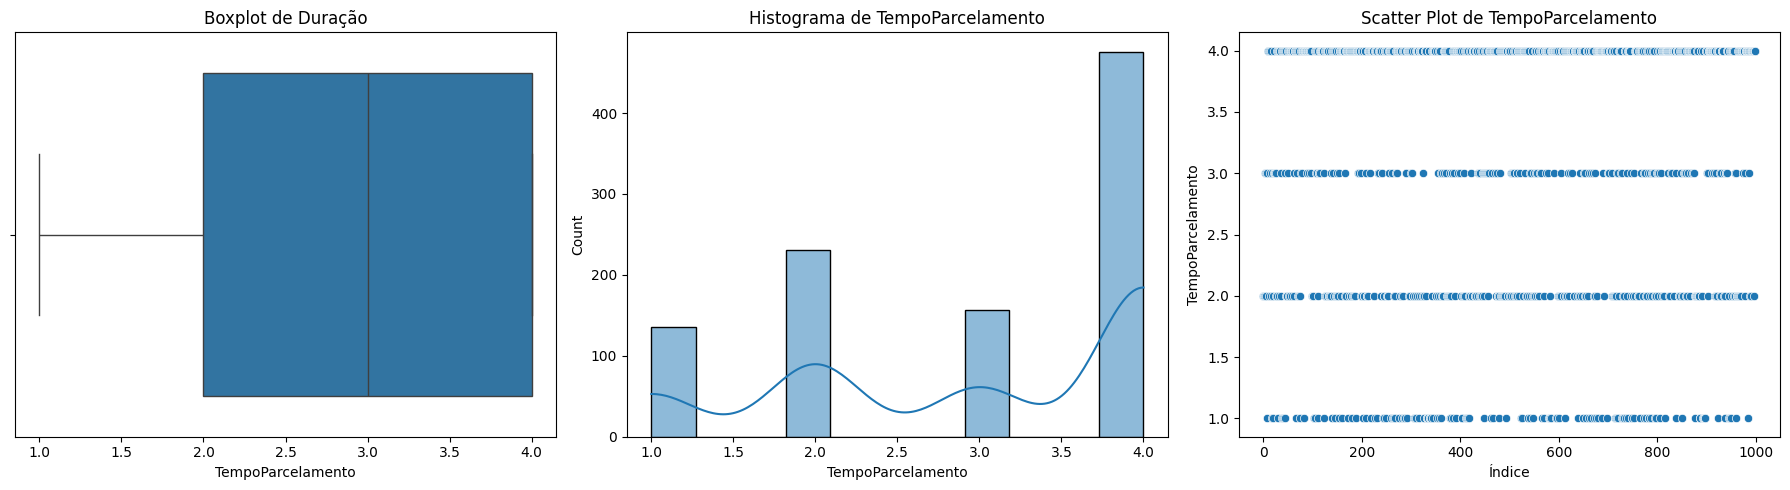

In [ ]:
# Gráficos
my_numerical_graphics(df_credito, 'TempoParcelamento')

In [ ]:
# Coluna ResidenciaDesde
groupby_ResidenciaDesde = df_credito.groupby(df_credito['ResidenciaDesde']).size()
groupby_ResidenciaDesde

ResidenciaDesde
1.0    129
2.0    308
3.0    147
4.0    409
dtype: int64

In [ ]:
# Coluna Idade
df_credito['Idade'].describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Idade, dtype: float64

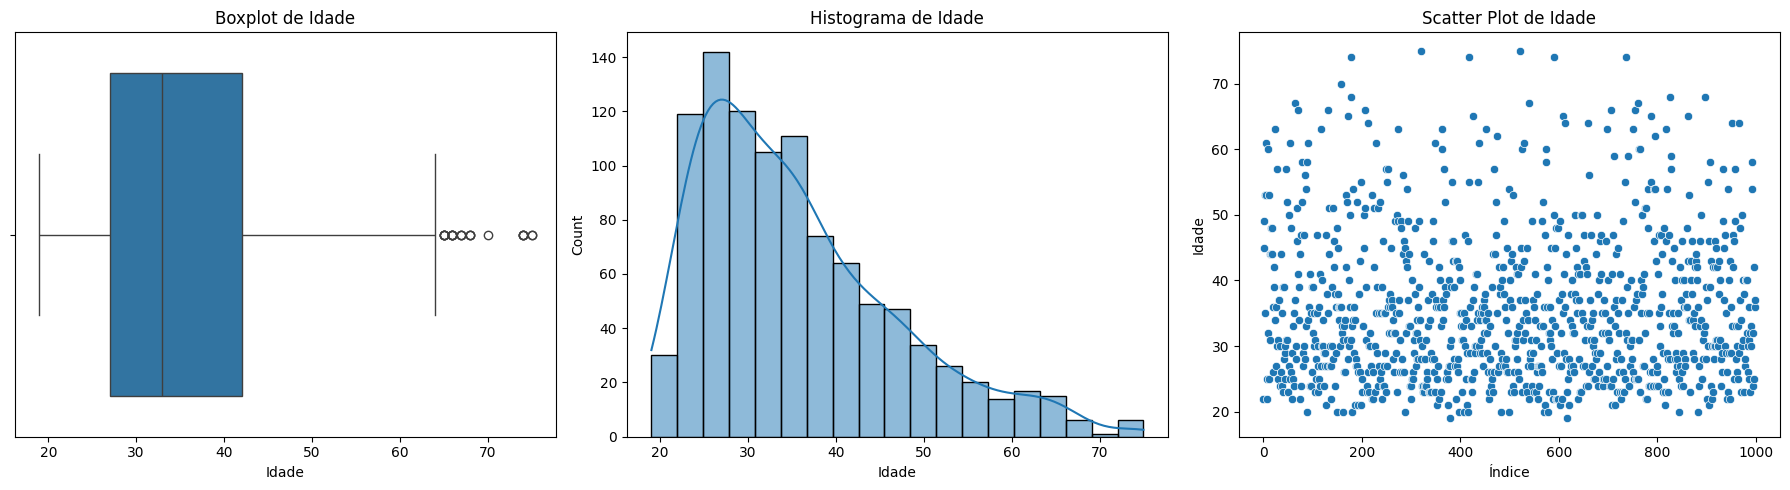

In [ ]:
# Gráficos
my_numerical_graphics(df_credito, 'Idade')

In [8]:
df_credito.describe()

,IdCredito,Duracao,Valor,TempoParcelamento,ResidenciaDesde,Idade,EmprestimoExistente,Dependentes
count,1000.000000,1000.000000,1000.000000,1000.000000,993.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,20.903000,3271.258000,2.973000,2.841893,35.546000,1.407000,1.155000
std,288.819436,12.058814,2822.736876,1.118715,1.103594,11.375469,0.577654,0.362086
min,1.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,250.750000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,500.500000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,750.250000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1000.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [9]:
# Coluna EmprestimoExistente
df_credito['EmprestimoExistente'].describe()

count    1000.000000
mean        1.407000
std         0.577654
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         4.000000
Name: EmprestimoExistente, dtype: float64

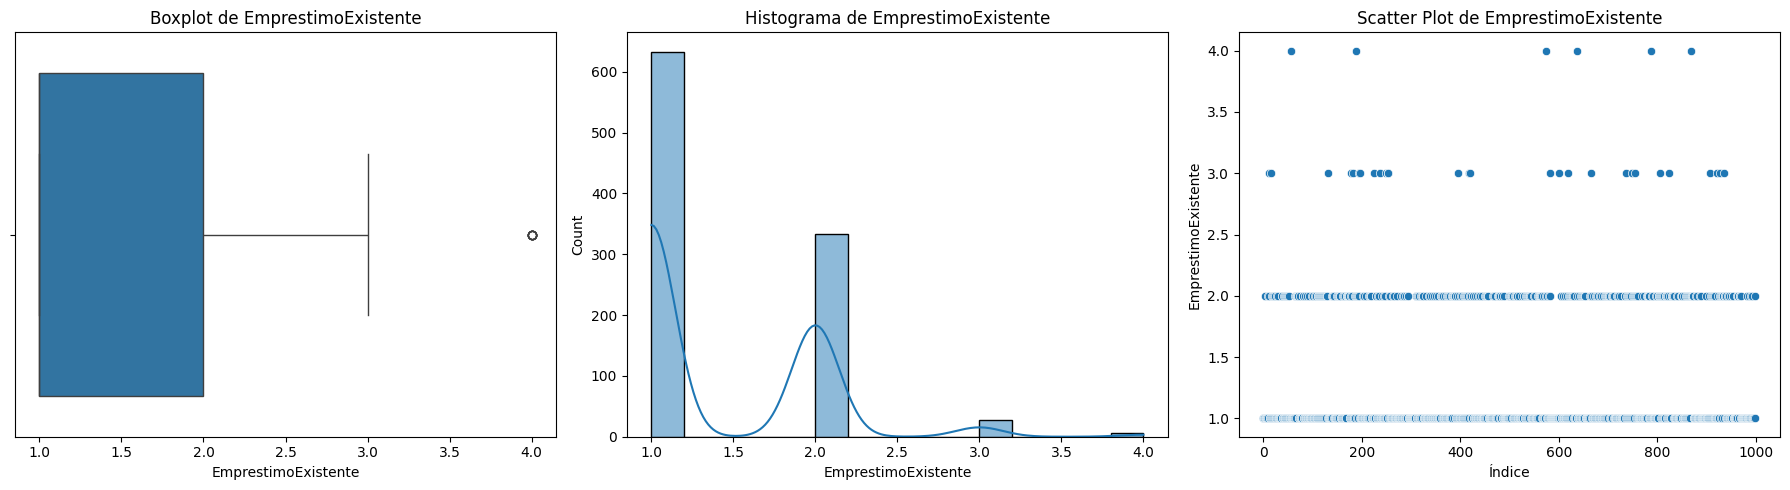

In [11]:
my_numerical_graphics(df_credito, 'EmprestimoExistente')

In [ ]:
# Coluna Dependente
df_credito['Dependentes'].describe()

count    1000.000000
mean        1.155000
std         0.362086
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: Dependentes, dtype: float64

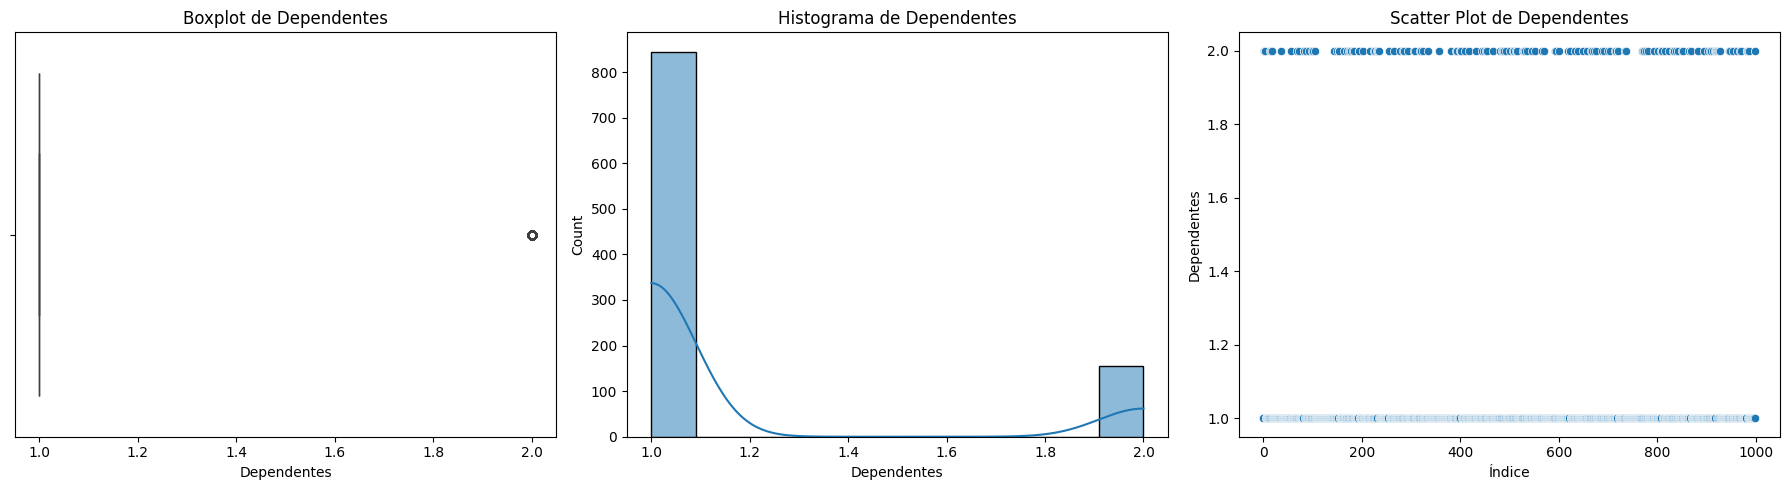

In [14]:
# Gráficos
my_numerical_graphics(df_credito, 'Dependentes')